In [1]:
cnfl = [true]
include("PVCR.jl");

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(

## Residential Cases
The analysis of optimal adoption in residential cases uses a decision making model as follows: 
 - The adoption of PV shouldn't induce net economic losses within the 5 years, calculated as the simple sum of the first 60 bills. 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 0.0 since the expectation is to see saving over all the periods. 

In [17]:
cnfl_residential.tariff = R_CNFL
consumption = 100:50:2500
pv_res = []
for (ix, co) in enumerate(consumption)
    cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
    res = optimal_pv(cnfl_residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    push!(pv_res, res[1][2])
end

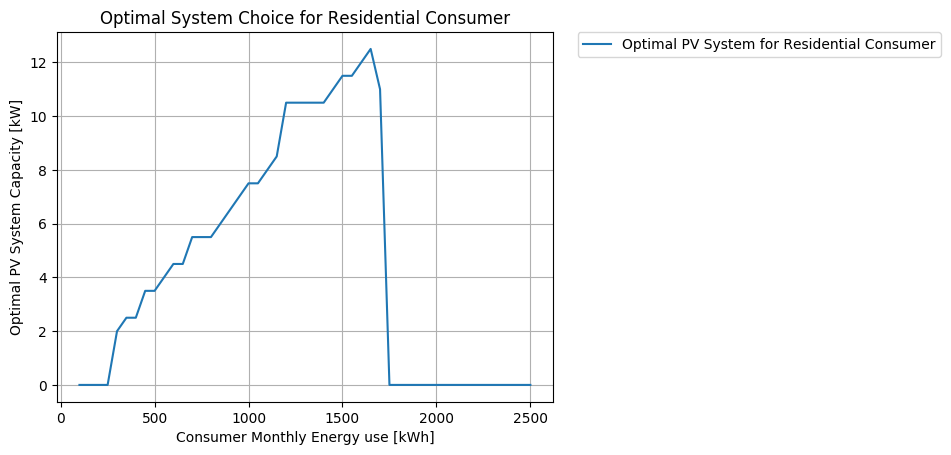

PyObject Text(0.5, 1, 'Optimal System Choice for Residential Consumer')

In [3]:
plot(consumption, pv_res, label = "Optimal PV System for Residential Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Residential Consumer")

## Commercial Industrial Cases
The analysis of optimal adoption in commercial-industrial cases uses a decision making model as follows: 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 6.0 % the same as the reference rate of risk free APY in colones

In [21]:
cnfl_commercial.tariff = CI_CNFL
consumption1 = 500:50:3000
pv_comind = []
for (ix, co) in enumerate(consumption1)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:0.5:20, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

In [22]:
consumption2 = 3500:50:6000
for (ix, co) in enumerate(consumption2)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:1:40, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

In [23]:
consumption3 = 6100:100:10000
for (ix, co) in enumerate(consumption3)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

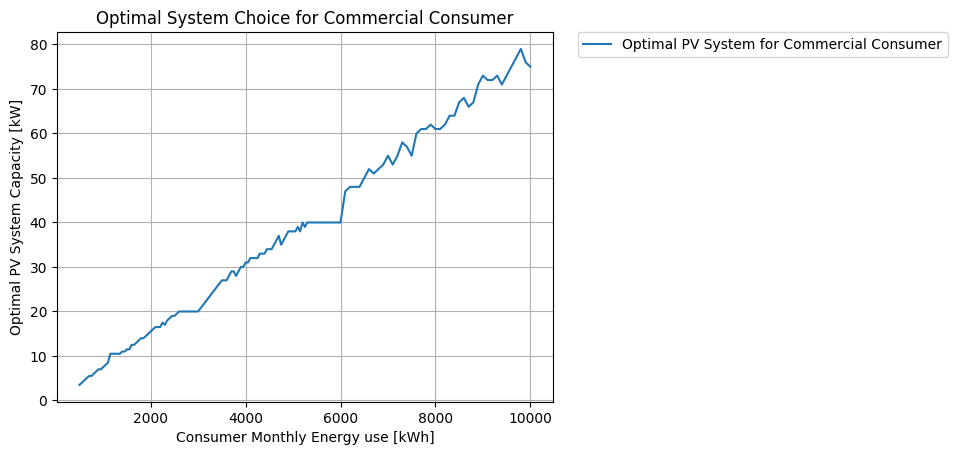

PyObject Text(0.5, 1, 'Optimal System Choice for Commercial Consumer')

In [7]:
plot(vcat(consumption1, consumption2, consumption3), pv_comind, label = "Optimal PV System for Commercial Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Commercial Consumer")

## Medium Voltage Cases
- Uses same criteria as in the Commercial - Industrial cases 

In [7]:
consumption = 10000:5000:100000
pv_tmt = []
for (ix, co) in enumerate(consumption)
     cnfl_mediumvoltage.econsumption = co; get_pmax(cnfl_mediumvoltage);
    res = optimal_pv(cnfl_mediumvoltage, PVTMT, 0:10.0:1000.0, BAC1, tariff_increase = true)
    push!(pv_tmt, res[1][2])
end

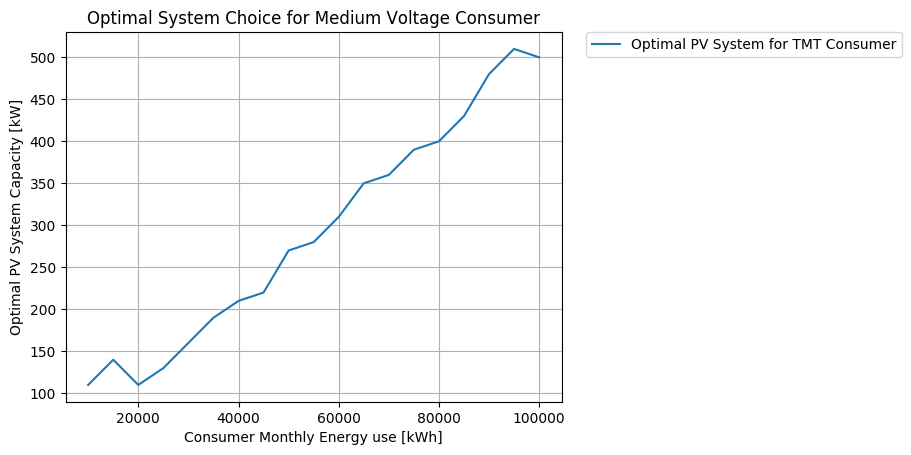

PyObject Text(0.5, 1, 'Optimal System Choice for Medium Voltage Consumer')

In [8]:
plot(consumption,pv_tmt, label = "Optimal PV System for TMT Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Medium Voltage Consumer")

# Alternative Rate Model

# Residential Cases
The analysis of optimal adoption in residential cases uses a decision making model as follows: 
 - The adoption of PV shouldn't induce net economic losses within the 5 years, calculated as the simple sum of the first 60 bills. 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 0.0 since the expectation is to see saving over all the periods. 

In [ ]:
cnfl_residential.tariff = A_R_CNFL
consumption = 100:50:2500
pv_alt_res = []
for (ix, co) in enumerate(consumption)
    cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
    res = optimal_pv(cnfl_residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    println(res)
    push!(pv_alt_res, res[1][2])
end

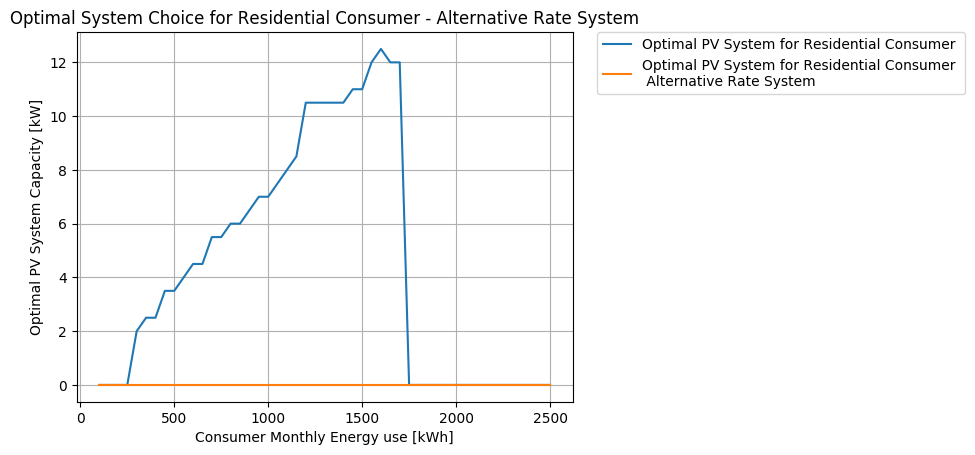

PyObject Text(0.5, 1, 'Optimal System Choice for Residential Consumer - Alternative Rate System')

In [31]:
plot(consumption, pv_res, label = "Optimal PV System for Residential Consumer")
plot(consumption, pv_alt_res, label = "Optimal PV System for Residential Consumer \n Alternative Rate System")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Residential Consumer - Alternative Rate System")

# Commercial Industrial Cases
The analysis of optimal adoption in commercial-industrial cases uses a decision making model as follows: 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 6.0 % the same as the reference rate of risk free APY in colones

In [24]:
cnfl_commercial.tariff = A_CI_CNFL
consumption1 = 500:50:3000
pv_alt_comind = []
for (ix, co) in enumerate(consumption1)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:0.5:20, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

In [25]:
consumption2 = 3500:50:6000
for (ix, co) in enumerate(consumption2)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:1:40, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

In [26]:
consumption3 = 6100:100:10000
for (ix, co) in enumerate(consumption3)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

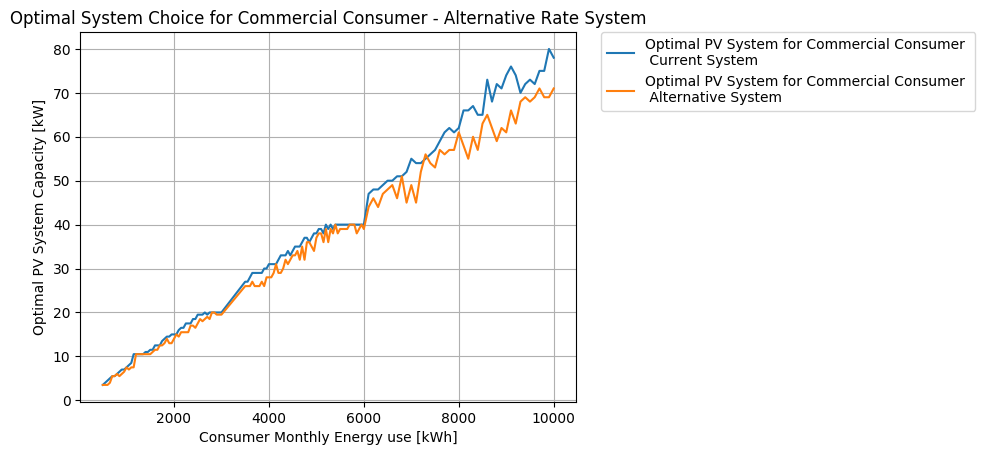

PyObject Text(0.5, 1, 'Optimal System Choice for Commercial Consumer - Alternative Rate System')

In [28]:
plot(vcat(consumption1, consumption2, consumption3), pv_comind, label = "Optimal PV System for Commercial Consumer \n Current System")
plot(vcat(consumption1, consumption2, consumption3), pv_alt_comind, label = "Optimal PV System for Commercial Consumer \n Alternative System")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Commercial Consumer - Alternative Rate System")

# Medium Voltage Cases
- Uses same criteria as in the Commercial - Industrial cases 

In [4]:
cnfl_mediumvoltage.tariff = A_TMT_CNFL
consumption = 10000:5000:100000
pv_alt_tmt = []
for (ix, co) in enumerate(consumption)
    cnfl_mediumvoltage.econsumption = co; get_pmax(cnfl_mediumvoltage);
    res = optimal_pv(cnfl_mediumvoltage, PVTMT, 0:10.0:1000.0, BAC1, tariff_increase = true)
    push!(pv_alt_tmt, res[1][2])
end

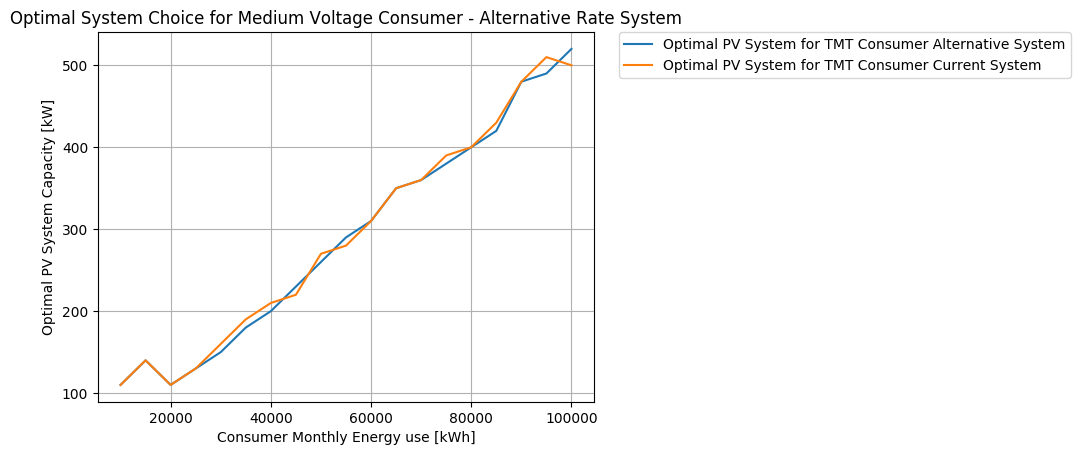

PyObject Text(0.5, 1, 'Optimal System Choice for Medium Voltage Consumer - Alternative Rate System')

In [9]:
plot(consumption, pv_alt_tmt, label = "Optimal PV System for TMT Consumer Alternative System")
plot(consumption, pv_tmt, label = "Optimal PV System for TMT Consumer Current System")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Medium Voltage Consumer - Alternative Rate System")

# Monte Carlo Residential
- For each of the sample locations in the CNFL service territory, we have a corresponding output from a theoretical 1kW system placed there. For each such data point, determine the optimal PV system installation at that location

In [ ]:
using PyPlot
using DelimitedFiles
# pyplot()
fig = plt.figure() #plot(rand(10))#
random_res_consumption = rand(100:2500,20)# Random subset of consumption values 100:50:2500

mc_filename = string("data/monte_carlo_data/CNFL_37.txt")
if isfile(mc_filename)
    mc_pv_output = readdlm(mc_filename, '\t', Float64, '\n')
else
    println("Can't find NSRDB+SAM output")
    return
end

cnfl_residential.tariff = R_CNFL
for pv_output in eachcol(mc_pv_output)
    mcPVRes = newPVRes(pv_output)
    new_axis = fig.add_subplot(111)
    pv_res = []
    for (ix, co) in enumerate(random_res_consumption)
        cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
        res = optimal_pv(cnfl_residential, mcPVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
        push!(pv_res, res[1][2])
    end
    new_axis.scatter(random_res_consumption, pv_res, marker=".", alpha=0.2)
end

ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Residential Consumer (Various Locations)")

In [ ]:
fig = plt.figure() #plot(rand(10))#
random_comind_consumption = rand(500:10000,20)# Random subset of commercial values

mc_filename = string("data/monte_carlo_data/CNFL_37.txt")
if isfile(mc_filename)
    mc_pv_output = readdlm(mc_filename, '\t', Float64, '\n')
else
    println("Can't find NSRDB+SAM output")
    return
end

cnfl_commercial.tariff = CI_CNFL
for pv_output in eachcol(mc_pv_output)
    mcPVComInd = newPVComInd(pv_output)
    new_axis = fig.add_subplot(111)
    pv_comInd = []
    for (ix, co) in enumerate(random_comind_consumption)
        cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
        comInd = optimal_pv(cnfl_commercial, mcPVComInd, 0.0:2:80, BAC1, tariff_increase = true)
        push!(pv_comInd, comInd[1][2])
    end
    new_axis.scatter(random_comind_consumption, pv_comInd, marker=".", alpha=0.2)
end

ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Commercial Consumer (Various Locations)")